In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filepath = Path(__file__).parent
filepath = Path(os.path.abspath(''))
print(filepath)

canc_col_name = "improve_sample_id"
drug_col_name = "improve_chem_id"

/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP


## Plot

In [2]:
def gen_plot(df: pd.DataFrame, fpath: str, tr_data: str, errorbar: bool=False, show: bool=False):
    """ ... """
    if errorbar:
        df_pivot = df.pivot(index='drug_name', columns=canc_col_name, values=['pred_mean', 'pred_std'])
    else:
        df_pivot = df.pivot(index='drug_name', columns=canc_col_name, values=['pred_mean'])

    # df_pivot = df_pivot.sort_values(('pred_mean', '655913~031-T'))
    random_pdo = df['improve_sample_id'].unique()[0]
    df_pivot = df_pivot.sort_values(('pred_mean', random_pdo))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(14, 8))

    # Get the number of drugs and cells
    drugs = df['drug_name'].unique()
    cells = df[canc_col_name].unique()
    bar_width = 0.4  # Width of the bars
    index = np.arange(len(drugs))  # The label locations

    # Use a color palette from seaborn
    # colors = sns.color_palette()
    colors = sns.color_palette("pastel")
    
    # Plot each cell
    for i, (cell, color) in enumerate(zip(cells, colors)):
        pred_mean = df_pivot['pred_mean'][cell].values
        if errorbar:
            pred_std = df_pivot['pred_std'][cell].values
            bars = ax.bar(index + i * bar_width, pred_mean, bar_width, yerr=pred_std,
                          label=cell, color=color, capsize=5, ecolor='black',
                          error_kw=dict(linestyle='--', linewidth=1))
        else:
            bars = ax.bar(index + i * bar_width, pred_mean, bar_width, label=cell,
                          color=color, capsize=5, ecolor='black')

        # Add annotations
        for bar, mean in zip(bars, pred_mean):
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{mean:.2f}', ha='center', va='bottom')

    # Add labels, title, and legend
    ax.set_xlabel('Drug')
    ax.set_ylabel('Predicted AUC (mean across data splits)')
    ax.set_title(f'{model_name}: Predicted AUC by Drug and PDO (trained on {tr_data})')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(drugs, rotation=45)
    ax.legend()
    ax.grid()

    ax.set_ylim(0.3, None)

    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(fpath, dpi=300)
    plt.show()

In [18]:
# # IMPROVE models
# # improve_models_list = ["DeepTTC", "GraphDRP", "HIDRA", "IGTD", "PaccMann_MCA"]
# # model_name = "DeepTTC"
# # model_name = "GraphDRP"
# # model_name = "HIDRA"
# # model_name = "IGTD"
# model_name = "PaccMann_MCA"
# # -------
# source = "CTRPv2"
# target = "PDMR"

# UNO
model_name = "UNO"
# -------
source = "all"
target = "PDMR"

agg_df = pd.read_csv(filepath / "plots_outdir" / f"agg_preds_{model_name}_{source}_{target}.tsv", sep="\t")

In [19]:
agg_df

,improve_sample_id,improve_chem_id,pred_mean,pred_std,drug_name
0,655913~031-T,Drug_1105,0.363167,0.046422,Docetaxel
1,937885~149-R,Drug_1105,0.577700,0.072038,Docetaxel
2,655913~031-T,Drug_1127,0.374117,0.055775,Paclitaxel
3,937885~149-R,Drug_1127,0.546033,0.088281,Paclitaxel
4,655913~031-T,Drug_1173,0.894742,0.030631,Melphalan
5,937885~149-R,Drug_1173,0.926725,0.019917,Melphalan
6,655913~031-T,Drug_1335,0.908733,0.026469,Olaparib
7,937885~149-R,Drug_1335,0.944783,0.008384,Olaparib
8,655913~031-T,Drug_1363,0.572500,0.019745,Doxorubicin
9,937885~149-R,Drug_1363,0.690850,0.028585,Doxorubicin


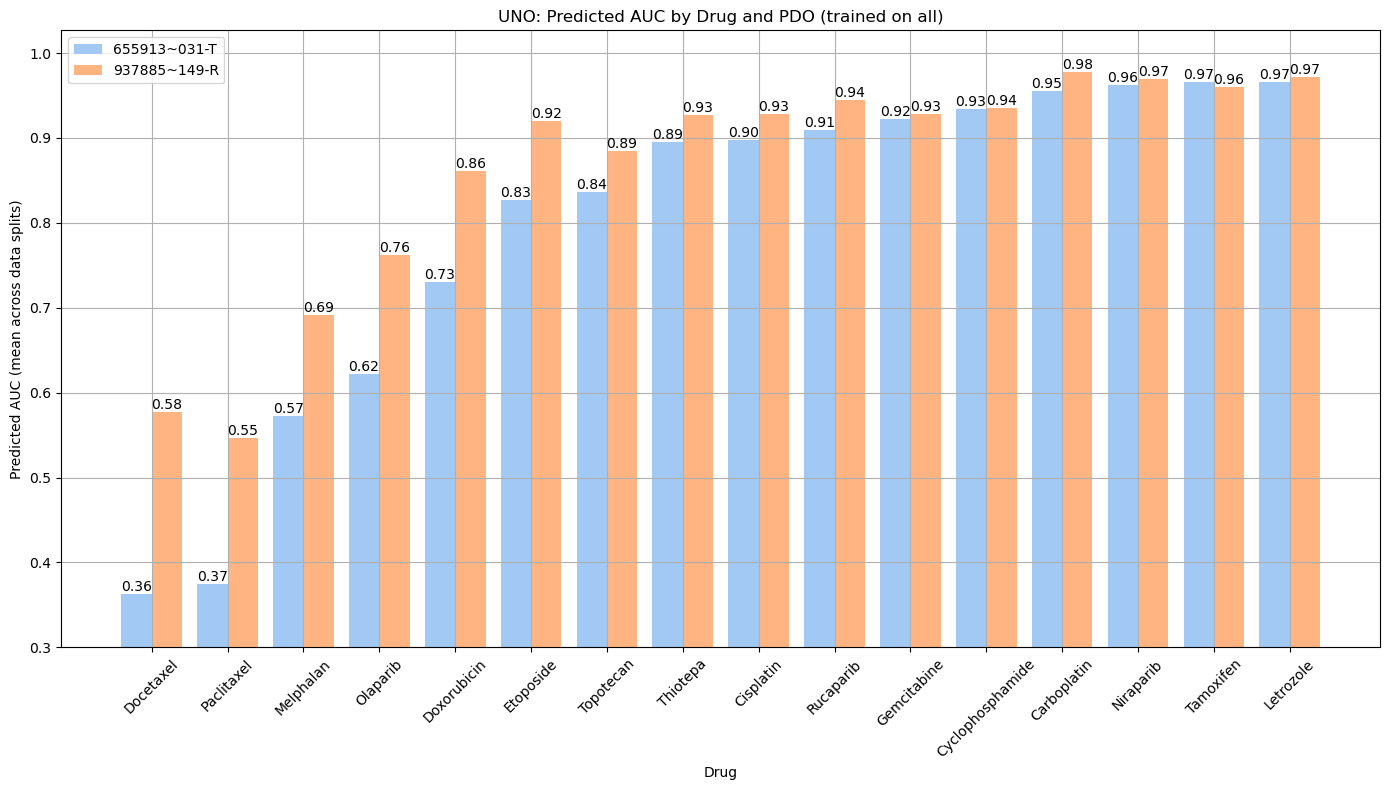

In [20]:
gen_plot(df=agg_df,
         fpath=filepath / "plots_outdir" / f'plot_{model_name}_{source}-{target}.png',
         tr_data=source, errorbar=False, show=True)